# TP1 

### Nom : Benmalek
### Prenom : Zohir
### Promo : MID 1ér année informatique 


In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [227]:
# Lire 'pour.tif' 
image = cv.imread("/home/azar/Desktop/traitement_images/TP1_Hist-OptPxl/pout.tif",0)


In [3]:
# plt.hist(img_normalized.ravel(),256,[0,256]);
# plt.imshow(img_normalized,cmap='gray');

### Écrire une fonctrion matlab qui permet de tracer l’histogramme et l’histogramme cumulé d’une image

In [141]:
def histogram (image,cumulative=False,auto_plot=True):
    
    nmpy_func = np.zeros(256)
    
    test = image.copy()
    
    for i in range(len(test)):
        for j in range(len(test[i])) :
            nmpy_func[test[i][j]] =nmpy_func[test[i][j]] +1

    if (cumulative == True):
        cummulative_hist = [nmpy_func[0]]
        for i in range(1, 256):
            cummulative_hist.append(float(cummulative_hist[i - 1] + nmpy_func[i]))
        if auto_plot :
            plt.plot(cummulative_hist)
            plt.title('Histogram cumulé')
            plt.show();
        return cummulative_hist
    if auto_plot :
        plt.bar([ i for i in range(0,256,1)],nmpy_func)
        plt.title('Histogram ')
        plt.show();
    return nmpy_func


#### Utiliser cette fonction pour construire les histogrammes des images ‘'pout.tif'’ et comparer le résultat avec la fonction matlab imhist.

Ma fonction : 


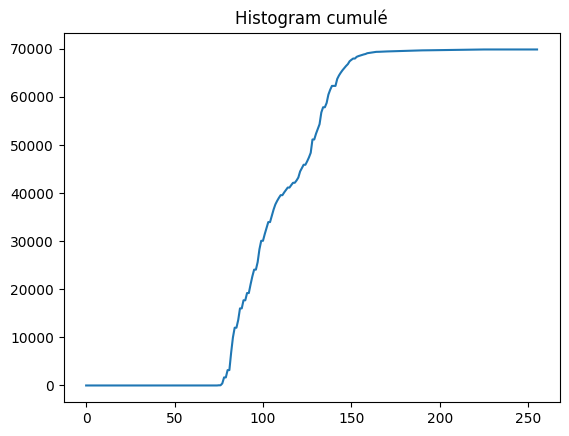

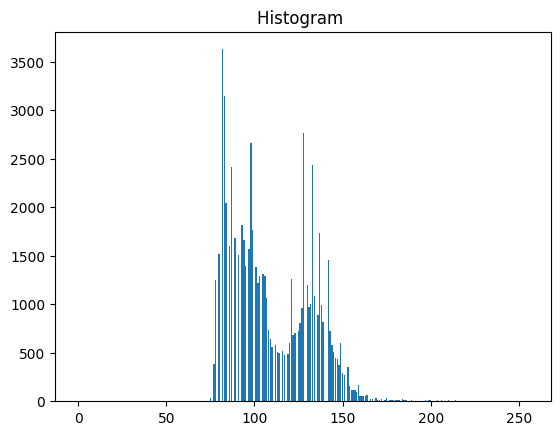

La fonction built in : 
1 non cumulative : 


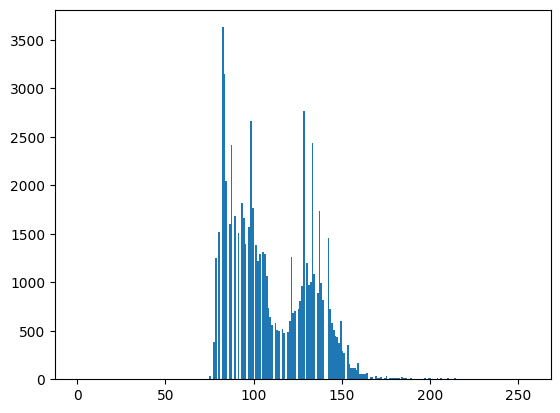

2 cumulative : 


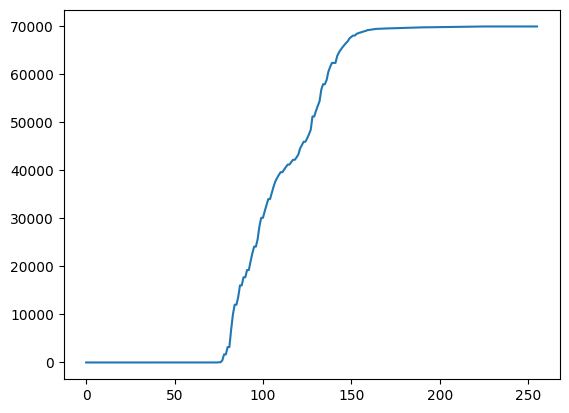

In [228]:
print("Ma fonction : ")
test1 = histogram(image,cumulative=True)
test2 = histogram(image,cumulative=False)
print("La fonction built in : ")
print("1 non cumulative : ")
plt.hist(image.ravel(),256,[0,256]);
plt.show()
print("2 cumulative : ")

# Calculate the histogram of the image
hist = cv.calcHist([image], [0], None, [256], [0, 256])
# Calculate the cumulative histogram
cum_hist = np.cumsum(hist)
plt.plot(cum_hist);

### Lire une image (aqui.pgm, pont.pgm, Loup-noir.jpg)

In [206]:
# image3 = cv.imread("/home/azar/Desktop/traitement_images/TP1_Hist-OptPxl/pont.pgm")
image2 = cv.imread("/home/azar/Desktop/traitement_images/TP1_Hist-OptPxl/aqui.pgm",0)
# image1 = cv.imread("/home/azar/Desktop/traitement_images/TP1_Hist-OptPxl/Loup-noir.jpg")

### Fonction de calcul du min et du max : 

In [69]:
def calculate_min_max(image):
    min_val = np.inf
    max_val = -np.inf
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            val = image[i,j]
            if val < min_val:
                min_val = val
                
            if val > max_val:
                max_val = val
    return min_val,max_val


### construire l'histogramme et trouver le min et le max 

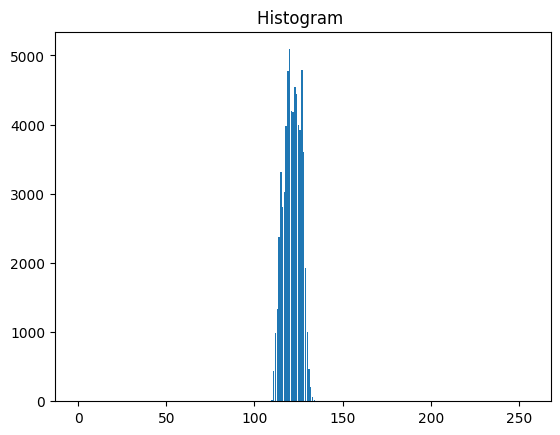

La valeur min : 110 . 
La valeur max : 140 .


In [70]:
img2 = histogram(image2)
min_val,max_val = calculate_min_max(image2)
print('La valeur min : {} . \nLa valeur max : {} .'.format(min_val,max_val))

### Fonction pour effectuer l'etirement .

In [88]:
def etirement_histogram(image_copie):
    image = image_copie.copy()
    min_val,max_val = calculate_min_max(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            image[i,j] = (image[i,j] - min_val) * (255.0 / (max_val - min_val))
    return image

### Effectuer un étirement d’histogramme et sauver la nouvelle image.
*L'image est sauver dans image_sauver

In [180]:
image_sauver = etirement_histogram(image2);

### La fonction de michelson_contrast

In [80]:
def michelson_contrast(image):
    min_val,max_val = calculate_min_max(image)
    michelson_contrast = (max_val - min_val) / (max_val + min_val)
    return michelson_contrast


### La fonction de rms_contrast

In [81]:
def rms_contrast(image):
    rms_contrast = np.sqrt(np.mean((image - np.mean(image))**2))
    return rms_contrast

### Evaluer qualitativement le résultat, puis quantitativement en réalisant la mesure du contraste (mesure de Michelson et RMS)

In [112]:
mc_img_1 = michelson_contrast(image2)
mc_img_2 = michelson_contrast(image_sauver)
rc_img_1 = rms_contrast(image2)
rc_img_2 = rms_contrast(image_sauver)
print ('La valeur de michelson_contrast de l\'image 1 est : ',mc_img_1)
print ('La valeur de michelson_contrast de l\'image 2 est : ',mc_img_2)
print ('La valeur de rms_contrast de l\'image 1 est : ',rc_img_1)
print ('La valeur de rms_contrast de l\'image 2 est : ',rc_img_2)

La valeur de michelson_contrast de l'image 1 est :  0.12
La valeur de michelson_contrast de l'image 2 est :  1.0
La valeur de rms_contrast de l'image 1 est :  4.743351087536052
La valeur de rms_contrast de l'image 2 est :  40.3185395621469


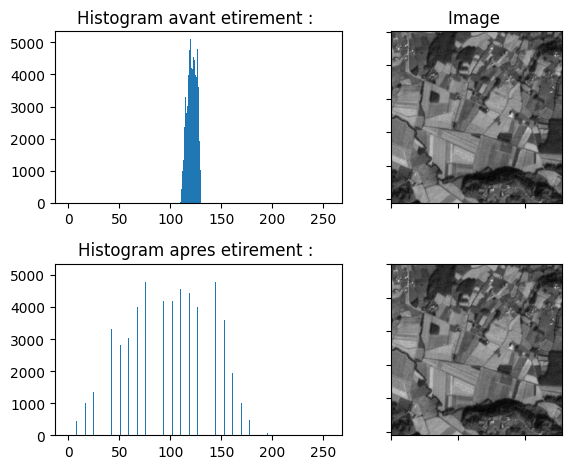

In [123]:
hist_image2 = histogram(image2,auto_plot=False);
hist_image2_sauver = histogram(image_sauver,auto_plot=False);

fig = plt.figure()

gs = fig.add_gridspec(2,2)
ax1 = fig.add_subplot(gs[0, 0])
ax1.bar([ i for i in range(0,256,1)],hist_image2)
ax1.set_title('Histogram avant etirement : ')


ax2 = fig.add_subplot(gs[0, 1])
ax2.imshow(image2,cmap='gray');
ax2.set_yticklabels([])
ax2.set_xticklabels([])
ax2.set_title('Image ')


ax3 = fig.add_subplot(gs[1, 0])
ax3.bar([ i for i in range(0,256,1)],hist_image2_sauver)
ax3.set_title('Histogram apres etirement : ')



ax4 = fig.add_subplot(gs[1, 1])
ax4.imshow(image_sauver,cmap='gray');
ax4.set_yticklabels([])
ax4.set_xticklabels([])
plt.tight_layout()
plt.show()


### Fonction de l'egalisation d’histogramme 

In [229]:
def egalisation_hist(image_origine):
    image = image_origine.copy()
    hist_cumule = histogram(image,cumulative=True,auto_plot=False)
    min_val,max_val = calculate_min_max(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            image[i,j] = 255*hist_cumule[image[i,j]]/ (image[i,j])
    return image , hist_cumule


In [230]:
image_egaliser , hist_cumule = egalisation_hist(image2);
hist_avant_egaliser = histogram(image2,cumulative=False,auto_plot=False)
hist_apre_egaliser = histogram(image_egaliser,cumulative=False,auto_plot=False)

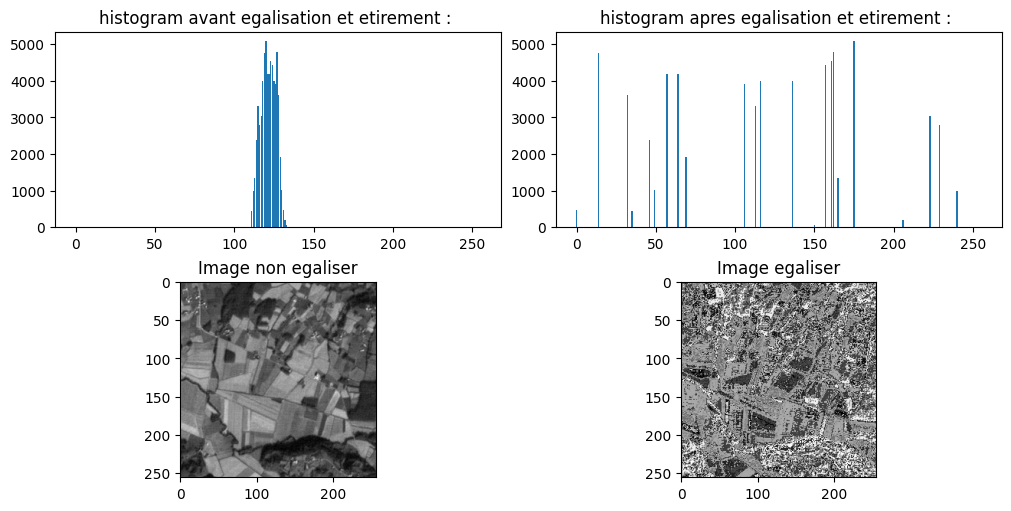

In [231]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(10, 5),layout="constrained")

axs[0,0].bar([ i for i in range(0,256,1)],hist_avant_egaliser)
axs[0,0].set_title('histogram avant egalisation et etirement : ')

axs[0,1].bar([ i for i in range(0,256,1)],hist_apre_egaliser)
axs[0,1].set_title('histogram apres egalisation et etirement : ')


axs[1,1].imshow(image_egaliser,cmap='gray');
axs[1,1].set_title('Image egaliser')

axs[1,0].imshow(image2,cmap='gray');
axs[1,0].set_title('Image non egaliser')
plt.show()